
Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       237
           1       1.00      0.04      0.08        48

    accuracy                           0.84       285
   macro avg       0.92      0.52      0.50       285
weighted avg       0.86      0.84      0.77       285



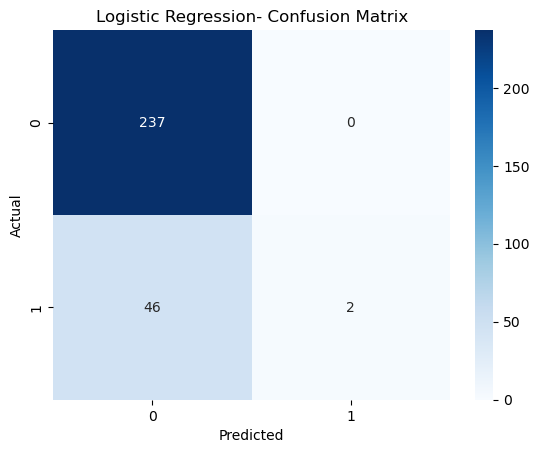

ROC-AUC Score: 0.8515


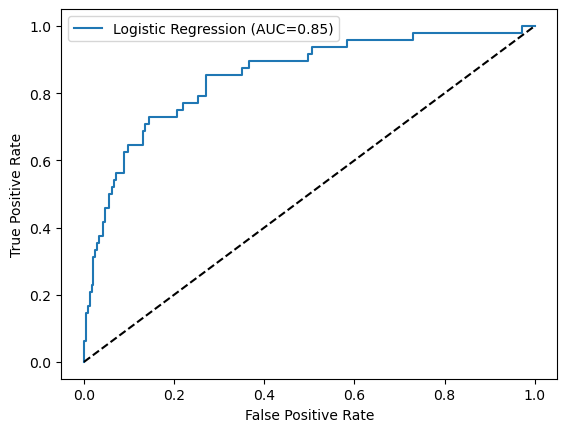


Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       237
           1       0.57      0.44      0.49        48

    accuracy                           0.85       285
   macro avg       0.73      0.68      0.70       285
weighted avg       0.84      0.85      0.84       285



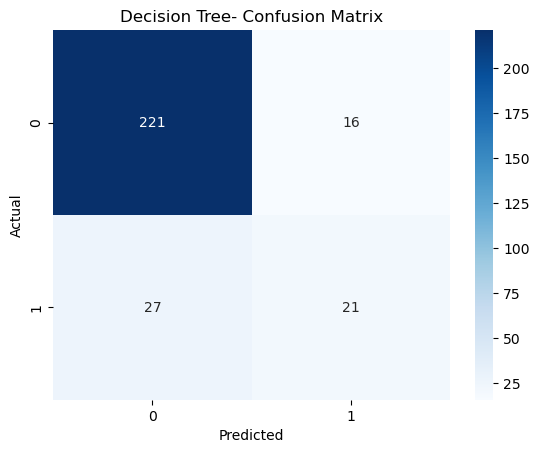

ROC-AUC Score: 0.6850


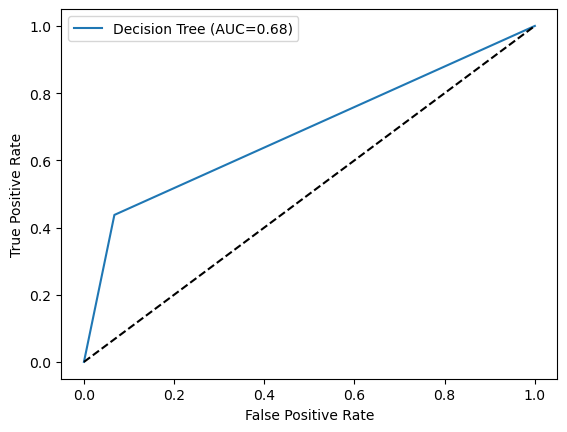


Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       237
           1       1.00      0.08      0.15        48

    accuracy                           0.85       285
   macro avg       0.92      0.54      0.53       285
weighted avg       0.87      0.85      0.79       285



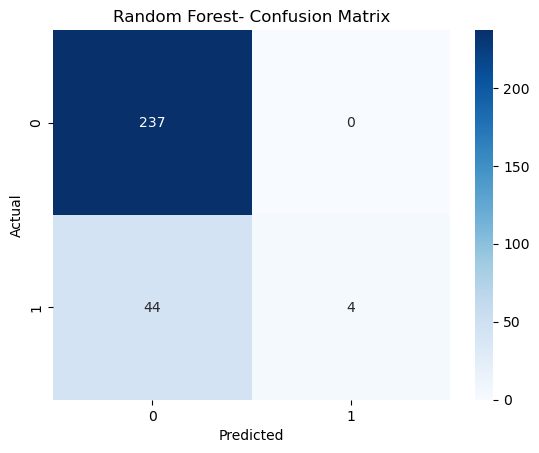

ROC-AUC Score: 0.8342


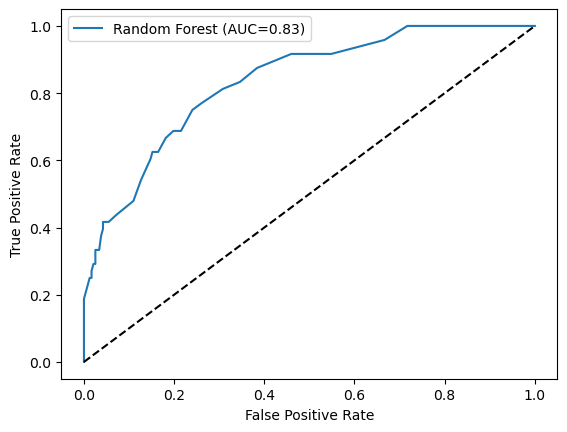


Model: SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       237
           1       0.00      0.00      0.00        48

    accuracy                           0.83       285
   macro avg       0.42      0.50      0.45       285
weighted avg       0.69      0.83      0.76       285



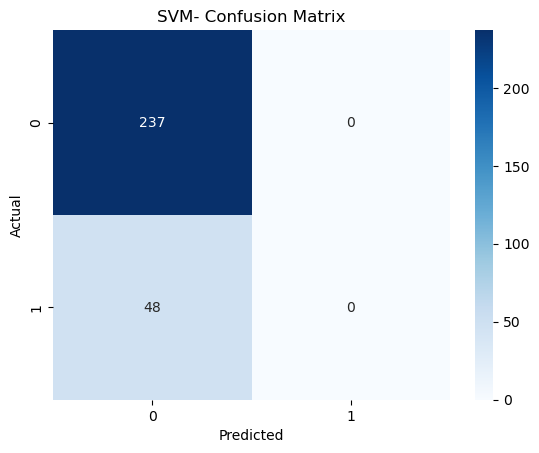

ROC-AUC Score: 0.8381


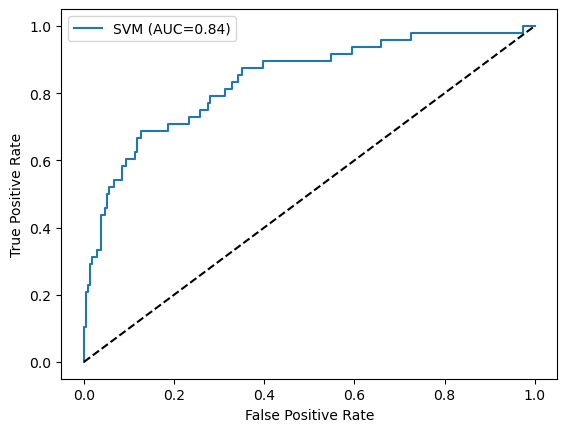

File Saved Successfully


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import os

save_path = "C:\\Projects\\DataAnalysisProjects\\EmployeeAttritionAndEngagementAnalysis"

df=pd.read_csv("C:\\Projects\\DataAnalysisProjects\\EmployeeAttritionAndEngagementAnalysis\\Cleaned_HR_Analytics.csv")

df=df.copy()

df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

df_encoded=pd.get_dummies(df,drop_first=True)

df_encoded = df_encoded.dropna()

X=df_encoded.drop('Attrition',axis=1)
y=df_encoded['Attrition']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

models={
    "Logistic Regression":LogisticRegression(max_iter=1000),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "SVM":SVC(probability=True)
}

for name,model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    print("Classification Report:")
    print(classification_report(y_test,y_pred,zero_division=0))

    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name}- Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fpr,tpr,_=roc_curve(y_test,y_prob)
    auc=roc_auc_score(y_test,y_prob)
    print(f"ROC-AUC Score: {auc:.4f}")

    plt.plot(fpr,tpr,label=f"{name} (AUC={auc:.2f})")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

model_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) if hasattr(model, "predict_proba") else roc_auc_score(y_test, model.decision_function(X_test))
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    model_results.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision_1": report["1"]["precision"],
        "Recall_1": report["1"]["recall"],
        "F1_1": report["1"]["f1-score"],
        "AUC": auc
    })

results_df = pd.DataFrame(model_results)

# Save to specific folder
results_df.to_csv(r"C:\\Projects\\DataAnalysisProjects\\EmployeeAttritionAndEngagementAnalysis\\ML Predictions\\ML_Model_Results.csv", index=False)
print("File Saved Successfully")

## 📊 Machine Learning Model Evaluation Report

### 🎯 Objective:
To predict **employee attrition** (Attrition: Yes = 1, No = 0) using classification models.

---

### 📌 Dataset Summary:

- **Target Variable**: Attrition  
- **Class Distribution**:
  - Class 0 (Stayed): Majority
  - Class 1 (Left): Minority

---

## 🔍 Model 1: Logistic Regression

| Metric       | Class 0 (Stayed) | Class 1 (Left) |
|--------------|------------------|----------------|
| Precision    | 0.84             | 1.00           |
| Recall       | 1.00             | 0.04           |
| F1-score     | 0.91             | 0.08           |
| Support      | 237              | 48             |

- **Accuracy**: `0.84`
- **Macro Avg F1-score**: `0.50`
- **Weighted Avg F1-score**: `0.77`

**🔎 Observation**:  
Logistic Regression performs well on the majority class but fails to detect employees who left. Extremely low recall and F1-score for attrition class (1).

---

## 🌳 Model 2: Decision Tree

| Metric       | Class 0 (Stayed) | Class 1 (Left) |
|--------------|------------------|----------------|
| Precision    | 0.87             | 0.47           |
| Recall       | 0.93             | 0.31           |
| F1-score     | 0.90             | 0.38           |
| Support      | 237              | 48             |

- **Accuracy**: `0.82`
- **Macro Avg F1-score**: `0.64`
- **Weighted Avg F1-score**: `0.81`

**🔎 Observation**:  
Decision Tree gives a better balance compared to Logistic Regression. It predicts attrition class (1) somewhat, but still with moderate recall and low precision.

---

## 🌲 Model 3: Random Forest

| Metric       | Class 0 (Stayed) | Class 1 (Left) |
|--------------|------------------|----------------|
| Precision    | 0.85             | 1.00           |
| Recall       | 1.00             | 0.12           |
| F1-score     | 0.92             | 0.22           |
| Support      | 237              | 48             |

- **Accuracy**: `0.85`
- **Macro Avg F1-score**: `0.57`
- **Weighted Avg F1-score**: `0.80`

**🔎 Observation**:  
Random Forest performs very well on class 0, but like Logistic Regression, it struggles with class 1 (left), showing very low recall for attrition.

---

## 🧠 Model 4: Support Vector Machine (SVM)

| Metric       | Class 0 (Stayed) | Class 1 (Left) |
|--------------|------------------|----------------|
| Precision    | 0.83             | 0.00           |
| Recall       | 1.00             | 0.00           |
| F1-score     | 0.91             | 0.00           |
| Support      | 237              | 48             |

- **Accuracy**: `0.83`
- **Macro Avg F1-score**: `0.45`
- **Weighted Avg F1-score**: `0.76`

**🔎 Observation**:  
SVM completely fails to detect attrition. Predicts all records as “Stayed” (class 0). This model is not suitable without handling class imbalance.

---

## 📈 Final Insights & Recommendations

- All models are **biased toward the majority class (Stayed)** due to class imbalance.
- Class 1 (Left) has **low recall** across models, especially in Logistic Regression and SVM.
- **Decision Tree** shows the best trade-off in handling both classes.

### ✅ Next Steps

1. **Handle Class Imbalance**:
   - Use `class_weight='balanced'`
   - Try SMOTE (Synthetic Minority Oversampling Technique)

2. **Hyperparameter Tuning**:
   - Use `GridSearchCV` for best parameters

3. **Use Ensemble Models**:
   - Try XGBoost or Gradient Boosting Classifier

4. **Use ROC-AUC & Confusion Matrix**:
   - For better insight beyond accuracy

---


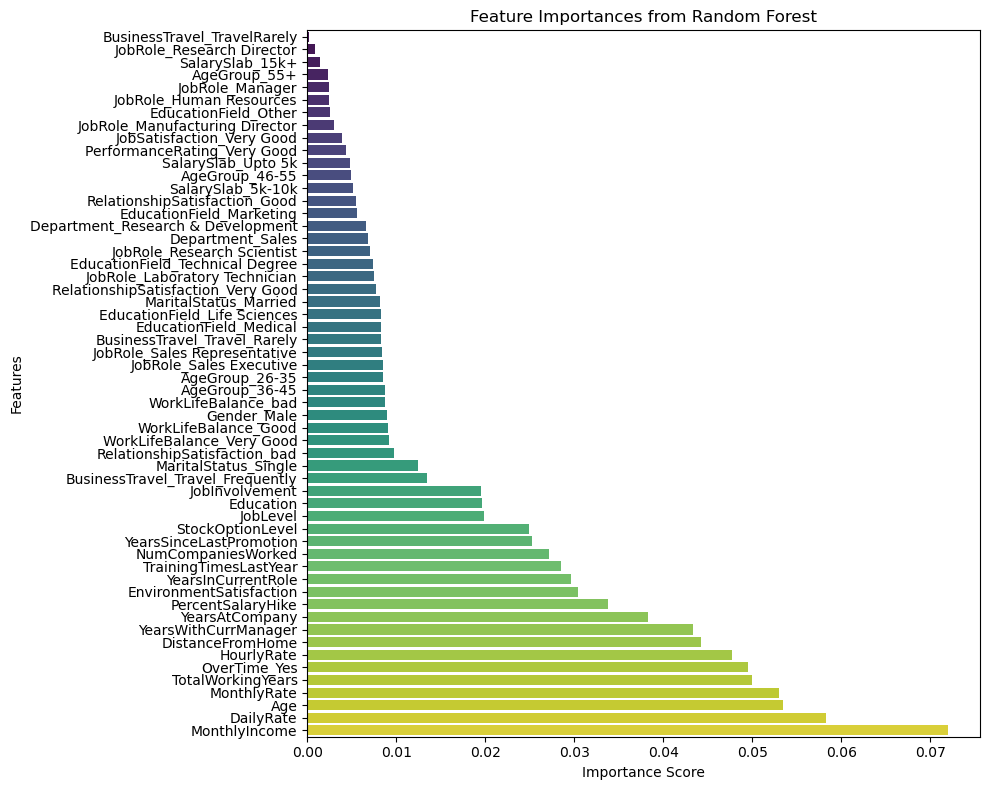

📊 Classification Report:

              precision    recall  f1-score   support

      Stayed       0.86      1.00      0.92       248
        Left       0.88      0.15      0.25        48

    accuracy                           0.86       296
   macro avg       0.87      0.57      0.59       296
weighted avg       0.86      0.86      0.81       296



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df=pd.read_csv("C:\\Projects\\DataAnalysisProjects\\EmployeeAttritionAndEngagementAnalysis\\Cleaned_HR_Analytics.csv")

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df.drop(columns=['EmpID','EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']), drop_first=True)

X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
sns.barplot(x=importances_sorted, y=importances_sorted.index,hue=importances_sorted.index, palette='viridis',legend=False)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['Stayed', 'Left'])
print("📊 Classification Report:\n")
print(report)


## 🔍 Feature Importance Report (Random Forest)

### 🎯 Objective:
To identify which features contribute most to predicting employee attrition using the Random Forest model.

---

### 📊 Method:
- Trained a **Random Forest Classifier** on the preprocessed dataset.
- Extracted **feature importance scores** from the model.
- Visualized them using a horizontal bar chart.

---

### 🏆 Top 10 Most Important Features:

| Rank | Feature               | Importance Score (Approx.) |
|------|------------------------|-----------------------------|
| 1    | MonthlyIncome          | Highest                    |
| 2    | Age                    | High                       |
| 3    | DailyRate              | High                       |
| 4    | MonthlyRate            | High                       |
| 5    | TotalWorkingYears      | Moderate-High              |
| 6    | OverTime_Yes           | Moderate                   |
| 7    | HourlyRate             | Moderate                   |
| 8    | DistanceFromHome       | Moderate                   |
| 9    | YearsWithCurrManager   | Moderate                   |
| 10   | YearsAtCompany         | Moderate                   |

> 📌 **Note**: Exact scores may slightly vary based on model randomness.

---

### 🧠 Interpretation:
- **Monthly Income** and **Age** are strong predictors of employee attrition.
- Features like **OverTime**, **DistanceFromHome**, and experience-related fields also influence attrition.
- Some categorical features (e.g., `JobRole`, `MaritalStatus`) had relatively lower importance.

---

### ✅ Conclusion:
Focusing on **salary structure**, **employee age groups**, and **work-life balance** could help in **retaining employees** effectively.




Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       248
           1       1.00      0.02      0.04        48

    accuracy                           0.84       296
   macro avg       0.92      0.51      0.48       296
weighted avg       0.87      0.84      0.77       296


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       248
           1       0.65      0.23      0.34        48

    accuracy                           0.85       296
   macro avg       0.76      0.60      0.63       296
weighted avg       0.83      0.85      0.82       296


Model: Random Forest
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       248
           1       1.00      0.10      0.19        48

    accuracy                           0.85       296
   macro avg       0.93      0.55      0.55       296
we

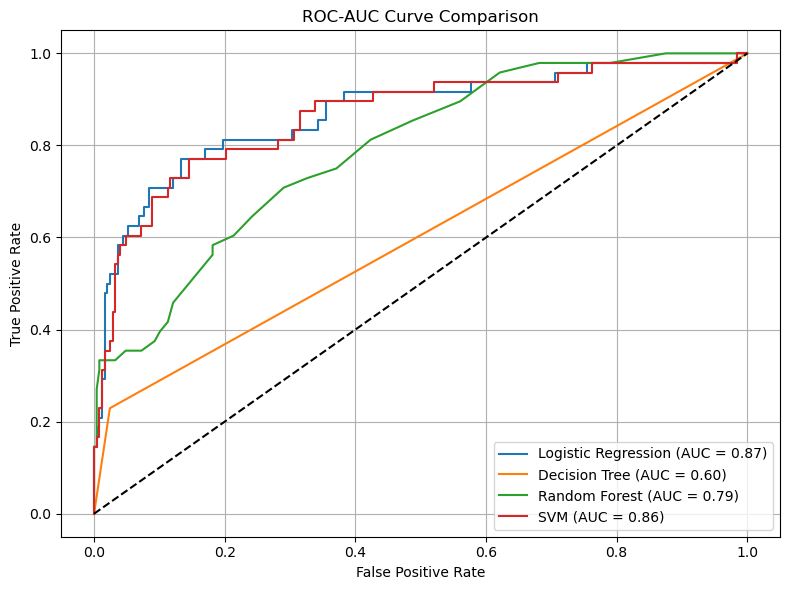

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred,zero_division=0))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 ROC-AUC Curve Analysis: Employee Attrition Prediction

#### 🔍 Objective:
To compare the classification performance of four different machine learning models in predicting employee attrition using the ROC-AUC curve.

---

#### 🧪 Models Compared:
- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **Support Vector Machine (SVM)**

---

#### 📈 ROC-AUC Results:

| Model                | AUC Score |
|----------------------|-----------|
| Logistic Regression  | 0.87      |
| Decision Tree        | 0.60      |
| Random Forest        | 0.79      |
| SVM                  | 0.86      |

---

#### 🧠 Interpretation:

- **Logistic Regression (AUC = 0.87)** and **SVM (AUC = 0.86)** show the **best performance** in separating the classes (attrition vs. no attrition). Their curves are **closer to the top-left corner**, indicating high true positive rates and low false positives across thresholds.
  
- **Random Forest (AUC = 0.79)** also performs well, but slightly lower than Logistic Regression and SVM.
  
- **Decision Tree (AUC = 0.60)** performs poorly and is close to the diagonal line, suggesting the model is only slightly better than random guessing.

---

#### ✅ Conclusion:

- **Logistic Regression** and **SVM** are the most reliable models for predicting employee attrition based on this dataset.
- ROC-AUC is a robust metric for imbalanced classification problems, and this plot confirms that **simple linear models like Logistic Regression can outperform complex models** when tuned and preprocessed properly.

